In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import f1_score
from os import path
from os import listdir
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from math import log2, e

In [2]:
jumps = [1, 2, 3, 5, 8, 13, 21, 34, 55]
def col(lst):
    ans = []
    for x in lst:
        if (x == 1):
            ans.append("#cfabcd")
        else:
            ans.append("#000000")
    return ans

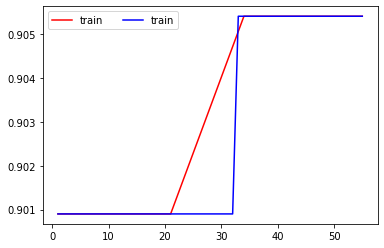

In [3]:
df1 = pd.read_csv("geyser.csv")
df1 = pd.DataFrame(df1)
Y = df1["class"].map({'P': 1, 'N': 0})
X = df1.drop(columns=["class"])
params = dict()
params["criterion"] = ("gini", "entropy")
params["splitter"] = ("best", "random") 
params["max_depth"] = (1, 1)
w = [0] * X.shape[0]
for i in range(X.shape[0]):
    w[i] = 1 / X.shape[0]
acc_score1 = []
acc_score2 = []
tree = []
for h in range(1, 56):
    worker = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1)
    worker.fit(X, Y, sample_weight=w).best_params_
    Val = worker.predict(X)
    amount_of_errors = 0
    for i in range(len(Val)):
        if (Y[i] != Val[i]):
            amount_of_errors += w[i]
    amount_to_say = 1 / 2 * log2((1 - amount_of_errors) / amount_of_errors)
    tree.append((worker, amount_to_say))
    for i in range(len(Val)):
        if (Y[i] != Val[i]):
            w[i] *= e ** amount_to_say
        else:
            w[i] *= e ** -amount_to_say
    sum_w = sum(w)
    for i in range(X.shape[0]):
        w[i] /= sum_w
    Y_pred = [0] * X.shape[0]
    for i in range(X.shape[0]):
        Y_pred[i] = [0] * 2
    for i in tree:
        v = i[0].predict(X)
        for j in range(X.shape[0]):
            if (v[j] == 0):
                Y_pred[j][0] += i[1]
            else:
                Y_pred[j][1] += i[1]
    Y_real_pred = [0] * X.shape[0]
    for j in range(X.shape[0]):
        if (Y_pred[j][0] < Y_pred[j][1]):
            Y_real_pred[j] = 1
        else:
            Y_real_pred[j] = 0
    if (h in jumps):
        acc_score1.append(accuracy_score(Y, Y_real_pred))
    acc_score2.append(accuracy_score(Y, Y_real_pred))
        
plt.plot(jumps, acc_score1, linestyle='solid', color='red', label="train")
plt.plot(range(1, 56), acc_score2, linestyle='solid', color='blue', label="train")
plt.legend(loc=2, ncol=2)
plt.show()

350 350 2200 2200


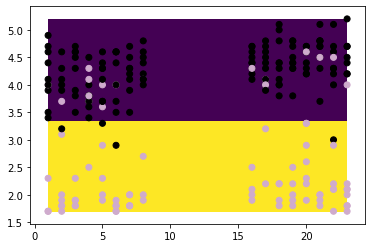

350 350 2200 2200


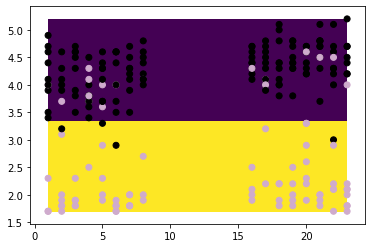

350 350 2200 2200


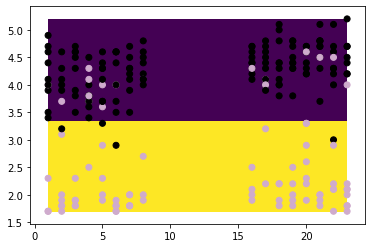

350 350 2200 2200


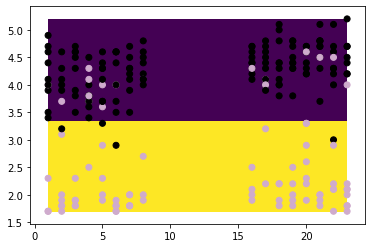

350 350 2200 2200


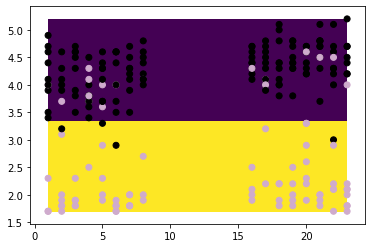

350 350 2200 2200


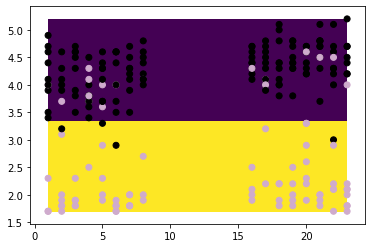

350 350 2200 2200


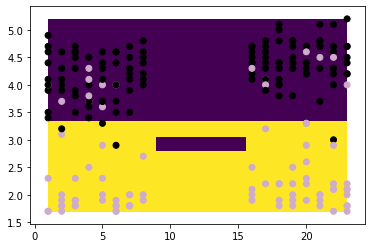

350 350 2200 2200


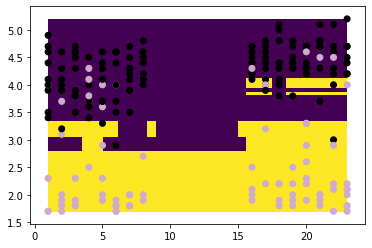

350 350 2200 2200


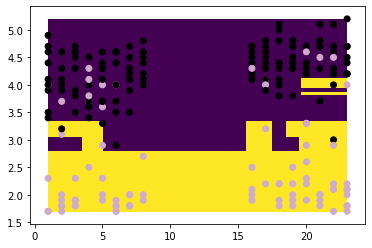

In [4]:
for h in jumps:
    INF = len(range(100, 2300)) * len(range(170, 520))
    points = [0] * INF
    ind = 0
    for j in range(170, 520):
        for i in range(100, 2300):
            points[ind] = [i / 100, j / 100]
            ind += 1
    points = np.mat(points)
    Y_pred = [0] * INF
    for i in range(INF):
        Y_pred[i] = [0] * 2
    for i in range(h):
        v = tree[i][0].predict(points)
        for j in range(INF):
            if (v[j] == 0):
                Y_pred[j][0] += tree[i][1]
            else:
                Y_pred[j][1] += tree[i][1]
    Y_real_pred = [0] * INF
    for j in range(INF):
        if (Y_pred[j][0] < Y_pred[j][1]):
            Y_real_pred[j] = 1
        else:
            Y_real_pred[j] = 0
    ys = []
    for i in range(100, 2300):
        ys.append(i / 100)
    xs = []
    for i in range(170, 520):
        xs.append(i / 100)
    c = [0] * len(range(170, 520))
    for i in range(170, 520):
        c[i - 170] = [0] * len(range(100, 2300))
        for j in range(100, 2300):
            c[i - 170][j - 100] = Y_real_pred[(i - 170) * len(range(100, 2300)) + j - 100]
    figure, axis = plt.subplots()
    print(len(c), len(xs), len(c[0]), len(ys))
    axis.pcolormesh(ys, xs, c)
    plt.scatter(list(X['x']), list(X['y']), c=col(np.array(Y)))
    plt.show()

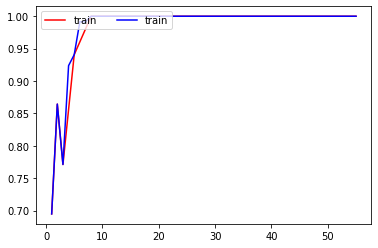

In [5]:
df2 = pd.read_csv("chips.csv")
df2 = pd.DataFrame(df2)
Y = df2["class"].map({'P': 1, 'N': 0})
X = df2.drop(columns=["class"])
params = dict()
params["criterion"] = ("gini", "entropy")
params["splitter"] = ("best", "random") 
params["max_depth"] = (1, 2, 3, 4, 5)
w = [0] * X.shape[0]
for i in range(X.shape[0]):
    w[i] = 1 / X.shape[0]
acc_score1 = []
acc_score2 = []
tree = []
for h in range(1, 56):
    worker = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1)
    worker.fit(X, Y, sample_weight=w).best_params_
    Val = worker.predict(X)
    amount_of_errors = 0
    for i in range(len(Val)):
        if (Y[i] != Val[i]):
            amount_of_errors += w[i]
    amount_to_say = 1 / 2 * log2((1 - amount_of_errors) / amount_of_errors)
    tree.append((worker, amount_to_say))
    for i in range(len(Val)):
        if (Y[i] != Val[i]):
            w[i] *= e ** amount_to_say
        else:
            w[i] *= e ** -amount_to_say
    sum_w = sum(w)
    for i in range(X.shape[0]):
        w[i] /= sum_w
    Y_pred = [0] * X.shape[0]
    for i in range(X.shape[0]):
        Y_pred[i] = [0] * 2
    for i in tree:
        v = i[0].predict(X)
        for j in range(X.shape[0]):
            if (v[j] == 0):
                Y_pred[j][0] += i[1]
            else:
                Y_pred[j][1] += i[1]
    Y_real_pred = [0] * X.shape[0]
    for j in range(X.shape[0]):
        if (Y_pred[j][0] < Y_pred[j][1]):
            Y_real_pred[j] = 1
        else:
            Y_real_pred[j] = 0
    if (h in jumps):
        acc_score1.append(accuracy_score(Y, Y_real_pred))
    acc_score2.append(accuracy_score(Y, Y_real_pred))
        
plt.plot(jumps, acc_score1, linestyle='solid', color='red', label="train")
plt.plot(range(1, 56), acc_score2, linestyle='solid', color='blue', label="train")
plt.legend(loc=2, ncol=2)
plt.show()

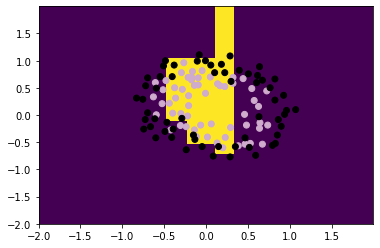

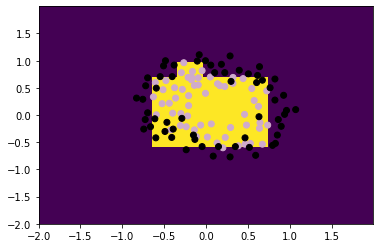

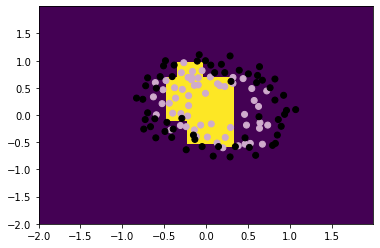

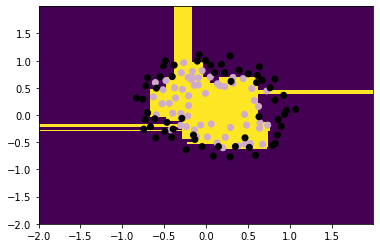

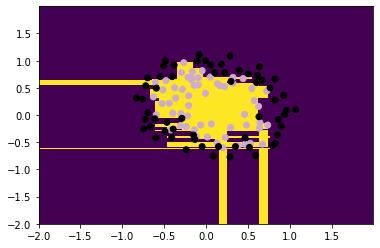

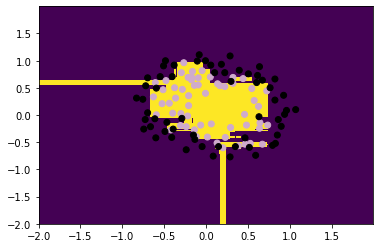

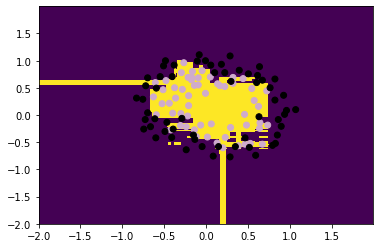

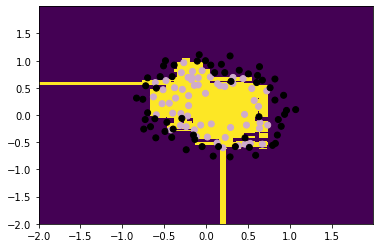

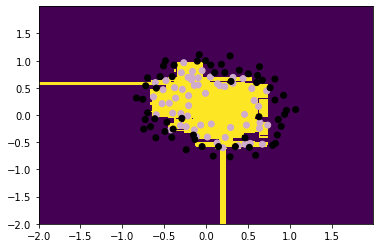

In [6]:
for h in jumps:
    INF = len(range(-2000, 2000)) * len(range(-2000, 2000))
    points = [0] * INF
    ind = 0
    for j in range(-2000, 2000):
        for i in range(-2000, 2000):
            points[ind] = [i / 1000, j / 1000]
            ind += 1
    points = np.mat(points)
    Y_pred = [0] * INF
    for i in range(INF):
        Y_pred[i] = [0] * 2
    for i in range(h):
        v = tree[i][0].predict(points)
        for j in range(INF):
            if (v[j] == 0):
                Y_pred[j][0] += tree[i][1]
            else:
                Y_pred[j][1] += tree[i][1]
    Y_real_pred = [0] * INF
    for j in range(INF):
        if (Y_pred[j][0] < Y_pred[j][1]):
            Y_real_pred[j] = 1
        else:
            Y_real_pred[j] = 0
    ys = []
    for i in range(-2000, 2000):
        ys.append(i / 1000)
    c = [0] * len(range(-2000, 2000))
    for i in range(len(range(-2000, 2000))):
        c[i] = [0] * len(range(-2000, 2000))
        for j in range(len(range(-2000, 2000))):
            c[i][j] = Y_real_pred[i * len(range(-2000, 2000)) + j]
    figure, axis = plt.subplots()
    axis.pcolormesh(ys, ys, c)
    plt.scatter(list(X['x']), list(X['y']), c=col(np.array(Y)))
    plt.show()